In [10]:
#导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [16]:
#获取数据
fdata = pd.read_excel('tips.xls')
fdata.head()
print(fdata)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [17]:
#分析数据
#查看数据的描述信息
fdata.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [18]:
#修改列名为汉字，并显示前5行数据
fdata.rename(columns = {'total_bill':'消费总额','tip':'小费',
                        'sex':'性别','smoker':'是否抽烟','day':'星期' ,
                        'time':'聚餐时间段','size':'人数'},inplace=True)
fdata.head()

,消费总额,小费,性别,是否抽烟,星期,聚餐时间段,人数
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='消费总额', ylabel='小费'>

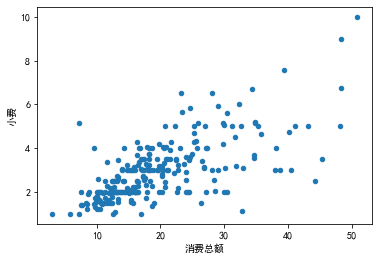

In [19]:
#分析小费金额和总金额的关系
fdata.plot(kind='scatter',x='消费总额',y='小费')

In [20]:
#分析男客和女顾客谁更慷慨
fdata.groupby('性别')['小费'].mean()

性别
Female    2.833448
Male      3.089618
Name: 小费, dtype: float64

['Sun' 'Sat' 'Thur' 'Fri']


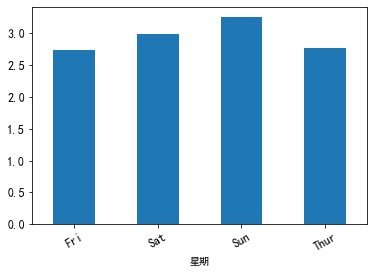

In [21]:
#分析日期和小费的关系
print(fdata['星期'].unique())
r=fdata.groupby('星期')['小费'].mean()
fig=r.plot(kind='bar',x='星期',y='小费',fontsize=12,rot=30)
fig.axes.title.set_size(16)

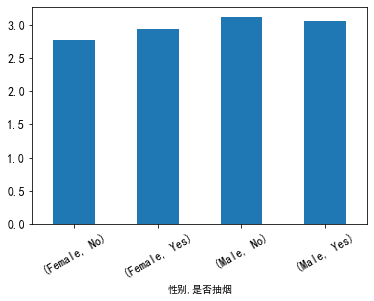

In [22]:
#性别+抽烟的组合因素对慷慨度的影响
r=fdata.groupby(['性别','是否抽烟'])['小费'].mean()
fig=r.plot(kind='bar',x=['性别','是否抽烟'],y='小费',fontsize=12,rot=30)
fig.axes.title.set_size(16)

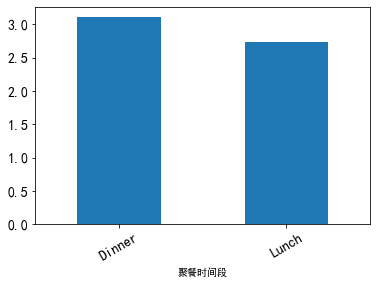

In [23]:
#分析聚餐时间段与小费数额的关系
r=fdata.groupby(['聚餐时间段'])['小费'].mean()
fig=r.plot(kind='bar',x='聚餐时间',y='小费',fontsize=14,rot=30)
fig.axes.title.set_size(16)